In [150]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [118]:
dados = pd.read_csv('acidentes_ambientais.csv', sep=',')
pd.DataFrame(dados)

C:\Users\Alexandre\AppData\Local\Temp\ipykernel_12316\3619066264.py:1: DtypeWarning: Columns (11,23) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv('acidentes_ambientais.csv', sep=',')


,FID,uuid,id_ocorrencia,id_municipio,id_uf,id_responsavel,des_complemento_tipo_localizaca,des_complemento_tipo_evento,des_complemento_instituicao_atu,des_complemento_tipo_dano_ident,...,dia_semana_primeira_obs,dia_semana_registro,institiuicoes_atuando_local,tipos_fontes_informacoes,tipos_danos_identificados,produtos_onu,produtos_outro,geom,dt_carga,feicao_proxima
0,adm_comunicacidente_p.fid--3632ffb4_183a01d739...,58852510-e800-4d5b-8cec-e2a6e9a37748,312,2706901.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Corpo de Bombeiros;Polícia Rodoviária,Mídia,Óbitos/feridos,NaN,NaN,POINT (-35.9511275 -9.6016711),2022-09-27T20:44:12,NaN
1,adm_comunicacidente_p.fid--3632ffb4_183a01d739...,2ea84fdc-4bd7-40ab-aeb5-06426572d339,313,3205309.0,8.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Corpo de Bombeiros,Mídia,Outro(s),NaN,NaN,POINT (-40.3016327 -20.2996826),2022-09-27T20:44:12,NaN
2,adm_comunicacidente_p.fid--3632ffb4_183a01d739...,29be7ae3-3190-4b40-bdfe-a0516bf20ac1,314,5003702.0,12.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Outra(s),Mídia,Fauna;Flora;População afetada/evacuada;Rio/cór...,NaN,NaN,POINT (-54.812208 -22.2206145),2022-09-27T20:44:12,NaN
3,adm_comunicacidente_p.fid--3632ffb4_183a01d739...,d896a564-adba-4332-86d0-595c1a7548c7,315,NaN,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Corpo de Bombeiros;Defesa Civil,Mídia,Solo,NaN,NaN,POINT (-47.9768478 -15.82326),2022-09-27T20:44:12,NaN
4,adm_comunicacidente_p.fid--3632ffb4_183a01d739...,40c5a5be-23bd-40d9-8106-a086c5433b67,316,4312054.0,21.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Outra(s),Mídia,Rio/córrego;Solo,NaN,NaN,POINT (-52.097268 -29.331113),2022-09-27T20:44:12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,adm_comunicacidente_p.fid--3632ffb4_183a01d739...,19023201-9998-4721-8909-db48889c030f,15247,3161700.0,13.0,10704.0,LAGOA,NaN,NaN,NaN,...,NaN,NaN,Órgão Estadual ou Municipal de Meio Ambiente;P...,Órgão Estadual ou Municipal de Meio Ambiente,Lago,NaN,NaN,POINT (-45.836810320616 -18.333417385427),2022-09-27T20:44:12,NaN
12966,adm_comunicacidente_p.fid--3632ffb4_183a01d739...,b0e2d175-597f-46e0-8080-33ec88286466,15248,3302403.0,19.0,10705.0,Duto flexível desativado (8'' MB-CP1) - Polo P...,Durante operação de descomissionamento de duto...,NaN,Durante operação de descomissionamento de duto...,...,NaN,NaN,NaN,Comunicado da empresa/responsável,Mar,NaN,NaN,POINT (-40.332944444444 -22.250527777778),2022-09-27T20:44:12,NaN
12967,adm_comunicacidente_p.fid--3632ffb4_183a01d739...,041fb493-6dba-4ffc-bd5b-47e856759c69,15249,NaN,NaN,10706.0,Mancha de Origem indeterminada reportada pela ...,Identificada mancha de origem indeterminada pe...,Equipe Petrobras,NaN,...,NaN,NaN,Outra(s),Comunicado da empresa/responsável,Mar,NaN,NaN,POINT (-39.832638888889 -21.962172222222),2022-09-27T20:44:12,NaN
12968,adm_comunicacidente_p.fid--3632ffb4_183a01d739...,cf90c95e-c511-458c-aa43-2c6f87939b1d,15251,3524402.0,25.0,10708.0,BR116/RJ/SP - Rodovia Presidente Dutra,Não houve vazamento da carga.,NaN,Não houve vazamento do produto na rodovia.,...,NaN,NaN,Corpo de Bombeiros;Polícia Rodoviária,Outra(s) fonte(s),Outro(s),NaN,Hipoclorito de sódio,POINT (46.015833333333 23.300391666667),2022-09-27T20:44:12,NaN


In [169]:
data = dados.drop(dados.columns[[0,1,2,3,4,5,6,7,8,9,10,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67]], axis=1)
data = data.rename(columns={'des_ocorrencia':'Ocorrencia','dt_registro':'Data', 'municipio':'Municipio','uf':'UF'})
data['Data'] = pd.to_datetime(data['Data'])
data['Data_Dia'] = pd.to_datetime(data['Data'].dt.day)
data['Data_Mes'] = pd.to_datetime(data['Data'].dt.month)
data['Data_Ano'] = pd.to_datetime(data['Data'].dt.year)
data = data.fillna('')


display(data)

,Ocorrencia,Data,Municipio,UF,Data_Dia,Data_Mes,Data_Ano
0,Tombamento de caminhão carregado de biocombust...,2008-01-01 00:00:00,Pilar,AL,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000002008
1,Explosão em depósito de gás.,2008-01-01 00:00:00,Vitória,ES,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000002008
2,Vazamento de esgoto em grande quantidade causa...,2009-01-01 00:00:00,Dourados,MS,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000002009
3,Tombamento de caminhão carregado de combustíve...,2009-01-01 00:00:00,,DF,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000002009
4,300 Kg de produtos poluidores encontrados ás m...,2009-01-01 00:00:00,Marques de Souza,RS,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000002009
...,...,...,...,...,...,...,...
12965,,2022-09-27 08:58:30,São Gonçalo do Abaeté,MG,1970-01-01 00:00:00.000000027,1970-01-01 00:00:00.000000009,1970-01-01 00:00:00.000002022
12966,,2022-09-27 09:42:49,Macaé,RJ,1970-01-01 00:00:00.000000027,1970-01-01 00:00:00.000000009,1970-01-01 00:00:00.000002022
12967,,2022-09-27 12:02:50,,,1970-01-01 00:00:00.000000027,1970-01-01 00:00:00.000000009,1970-01-01 00:00:00.000002022
12968,,2022-09-27 15:06:55,Jacareí,SP,1970-01-01 00:00:00.000000027,1970-01-01 00:00:00.000000009,1970-01-01 00:00:00.000002022


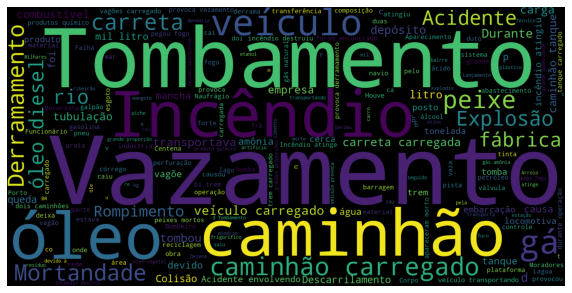

In [186]:
# WordCloud
texto = data['Ocorrencia'].to_string()
stopwords = set(STOPWORDS)
stopwords.update(['da','e','o','a','ocorreu','após', 'meu', 'em', 'você', 'de', 'ao', 'os', 'as', 'na', 'no', 'que', 'seu', 'se', 'não', 'dos', 'das', 'aos','desse','ainda', 'mas','qual','mais','ver','vez','este','ou','nas','também','ter','para','são','sua','ele','ela','um','uma','pois','entre','pode','esse','como','quando','alguns','por','já','essa','outro','outra','muito'])

wordcloud = WordCloud(stopwords = stopwords, background_color='black', width=1600, height=800).generate(texto)

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)
wordcloud.to_file('wordcloud.png')

In [197]:
texto.find('Tombamento')

9